In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy.stats as scs
import matplotlib.pyplot as plt

In [3]:
student_perform = pd.read_csv("/home/marina/Загрузки/StudentsPerformance.csv")

In [4]:
student_perform = student_perform.rename(columns = {"math score" : "math_score", 
                                                    "writing score": "writing_score", 
                                                    "reading score" : "reading_score"}) 

In [5]:
score_data = student_perform[['math_score','reading_score', 'writing_score']]

# Any dependences between reading/writing/math scores

<font size="4"> 1. Checking for "normality" </font>

In [6]:
#Z-standartization
math_score = student_perform.math_score.values
math_score = stats.zscore(math_score)

writing_score = student_perform.writing_score.values
writing_score = stats.zscore(writing_score)

reading_score = student_perform.reading_score.values
reading_score = stats.zscore(reading_score)

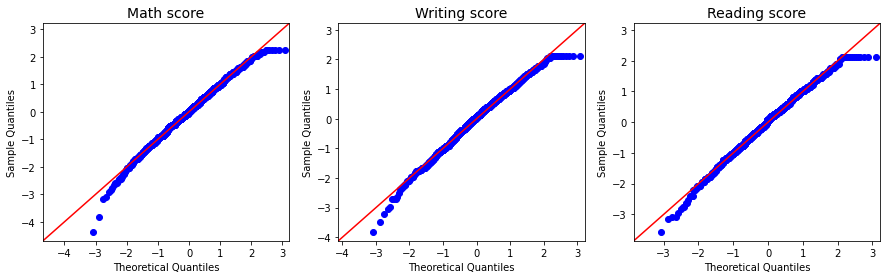

In [9]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(131)
ax.set_title('Math score',fontsize = 14)
sm.qqplot(math_score, line='45',ax = ax)

ax = fig.add_subplot(132)
ax.set_title('Writing score', fontsize = 14)
sm.qqplot(writing_score, line='45', ax = ax)

ax = fig.add_subplot(133)
ax.set_title('Reading score', fontsize = 14)
sm.qqplot(reading_score, line='45',ax = ax)

plt.show()


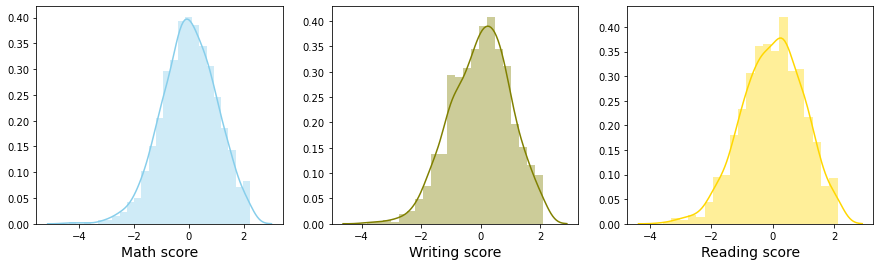

In [10]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.distplot(math_score, color = "skyblue")
plt.xlabel("Math score", fontsize = 14)

plt.subplot(132)
sns.distplot(writing_score, color = "olive")
plt.xlabel("Writing score", fontsize = 14)

plt.subplot(133)
sns.distplot(reading_score, color= "gold")
plt.xlabel("Reading score", fontsize = 14)

plt.show()

<font size="4"> We can see that the distributions are close to normal, but still they are biased </font>

In [11]:
stat, p_math = shapiro(math_score)
stat, p_writing = shapiro(writing_score)
stat, p_reading = shapiro(reading_score)
print(f' Shapiro-Wilk test p-value for math score: {p_math}')
print(f' Shapiro-Wilk test p-value for writing score: {p_writing}')
print(f' Shapiro-Wilk test p-value for reading score: {p_reading}')

 Shapiro-Wilk test p-value for math score: 0.0001448986295145005
 Shapiro-Wilk test p-value for writing score: 2.9179336706874892e-05
 Shapiro-Wilk test p-value for reading score: 0.00010579635272733867


<font size="4"> Shapiro-Wilk test confirms that distributions are not normal </font>

<font size="4"> 2. Correlation </font>

<font size="4"> According to the results of checking for normal distribution and conclusion that data distributed not normal,  I use nonparametric statistics (Spearman correlation coefficient). </font>

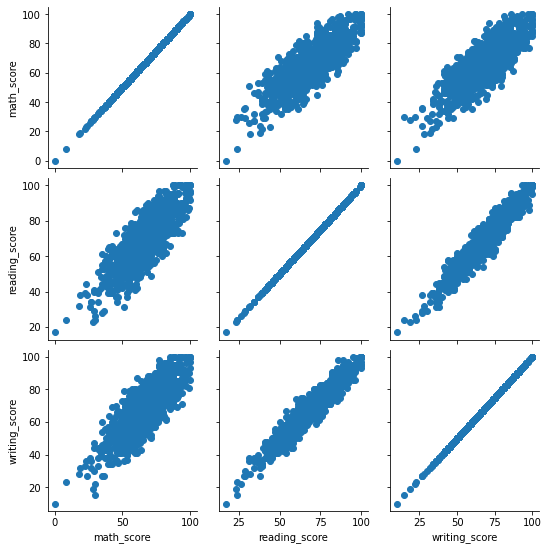

In [12]:
sns.PairGrid(score_data).map(plt.scatter)

In [13]:
score_data.corr(method = 'spearman') 

,math_score,reading_score,writing_score
math_score,1.000000,0.804064,0.778339
reading_score,0.804064,1.000000,0.948953
writing_score,0.778339,0.948953,1.000000


<font size="4"> 'Good' positive correlation between the variables </font>

<font size="4"> 3. Building linear model and checking the assumptions </font>

<font size="4"> Assumptions:
* linearity and additivity
* homoscedasticity of residuals
* normality of residuals disribution </font>

<font size="4"> a) Predicting math score by writing score or reading score </font>

In [15]:
lin_reg = LinearRegression()
math_writ_model = lin_reg.fit(student_perform[['writing_score']], student_perform[['math_score']])
math_writ_R_2 = math_writ_model.score(student_perform[['writing_score']], student_perform[['math_score']])
print(f' Predicting math score by writing score - R^2 coefficient: {math_writ_R_2}')


math_read_model = lin_reg.fit(student_perform[['reading_score']], student_perform[['math_score']])
math_read_R_2 = math_read_model.score(student_perform[['reading_score']], student_perform[['math_score']])
print(f' Predicting math score by reading score - R^2  coefficient: {math_read_R_2}')

 Predicting math score by writing score - R^2 coefficient: 0.6442342539264934
 Predicting math score by reading score - R^2  coefficient: 0.668436506450109


<font size="4"> To check linearity we can plot observed vs. predicted values </font>

In [16]:
math_writ_fitted_vals = math_writ_model.predict(student_perform[['writing_score']])
math_read_fitted_vals = math_read_model.predict(student_perform[['reading_score']])

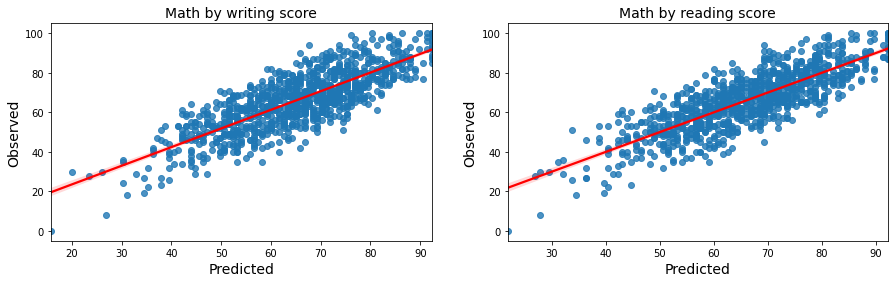

In [17]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.regplot(x = math_writ_fitted_vals, y = student_perform[['math_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Math by writing score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = math_read_fitted_vals, y = student_perform[['math_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Math by reading score', fontsize = 14)

plt.show()

<font size="4">  Checking homoscedasticity </font>

In [18]:
student_perform['math_writ_fitted'] = math_writ_fitted_vals
student_perform['math_writ_residuals'] = student_perform['math_score'] - student_perform['math_writ_fitted']
student_perform['math_read_fitted'] = math_read_fitted_vals
student_perform['math_read_residuals'] = student_perform['math_score'] - student_perform['math_read_fitted']

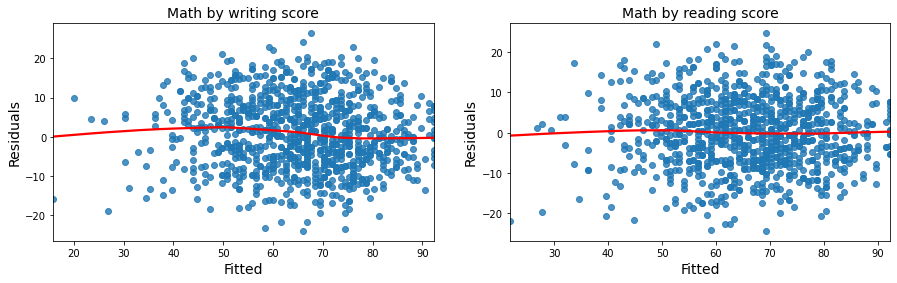

In [19]:
plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.regplot(x = "math_writ_fitted", y = "math_writ_residuals", 
            data = student_perform, lowess = True,  line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Math by writing score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = "math_read_fitted", y = "math_read_residuals", 
            data = student_perform, lowess = True, line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Math by reading score', fontsize = 14)

plt.show()

<font size="4">  Checking normal distribution of residuals </font>

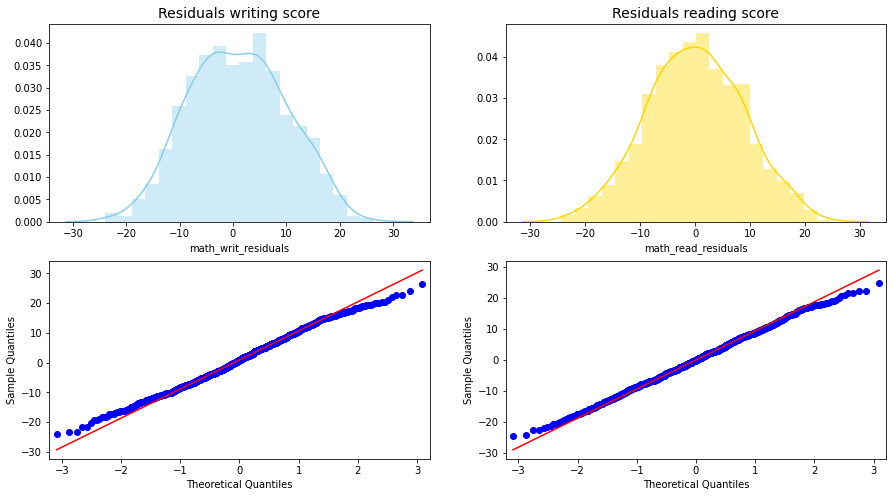

In [20]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(221)
sns.distplot(student_perform['math_writ_residuals'], color = "skyblue")
ax.set_title('Residuals writing score', fontsize = 14)

ax = fig.add_subplot(222)
sns.distplot(student_perform['math_read_residuals'], color= "gold")
ax.set_title('Residuals reading score', fontsize = 14)

ax = fig.add_subplot(223)
sm.qqplot(student_perform['math_writ_residuals'], line='q',ax = ax)

ax = fig.add_subplot(224)
sm.qqplot(student_perform['math_read_residuals'], line='q',ax = ax)


plt.show()

<font size="4"> b) Predicting writing score by math score or reading score </font>

In [36]:
lin_reg = LinearRegression()
writ_math_model = lin_reg.fit(student_perform[['math_score']], student_perform[['writing_score']])
writ_math_R_2 = writ_math_model.score(student_perform[['math_score']], student_perform[['writing_score']])
print(f' Predicting writing score by math score - R^2 coefficient: {writ_math_R_2}')


writ_read_model = lin_reg.fit(student_perform[['reading_score']], student_perform[['writing_score']])
writ_read_R_2 = writ_read_model.score(student_perform[['reading_score']], student_perform[['writing_score']])
print(f' Predicting writing score by reading score - R^2  coefficient: {writ_read_R_2}')

 Predicting writing score by math score - R^2 coefficient: 0.6442342539264932
 Predicting writing score by reading score - R^2  coefficient: 0.9112574888913137


<font size="4"> To check linearity we can plot observed vs. predicted values </font>

In [23]:
writ_math_fitted_vals = writ_math_model.predict(student_perform[['math_score']])
writ_read_fitted_vals = writ_read_model.predict(student_perform[['reading_score']])

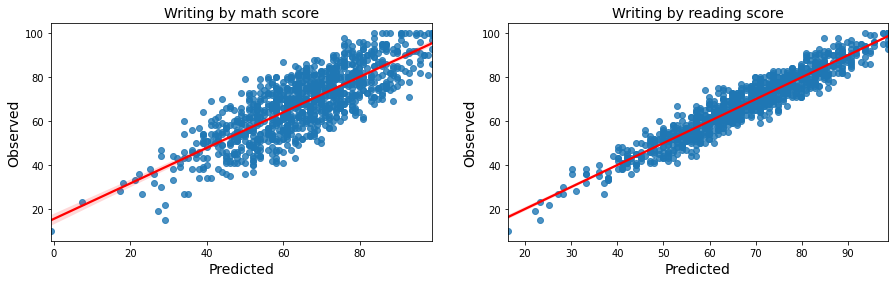

In [24]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.regplot(x = writ_math_fitted_vals, y = student_perform[['writing_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Writing by math score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = writ_read_fitted_vals, y = student_perform[['writing_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Writing by reading score', fontsize = 14)

plt.show()

<font size="4">  Checking homoscedasticity </font>

In [25]:
student_perform['writ_math_fitted'] = writ_math_fitted_vals
student_perform['writ_math_residuals'] = student_perform['writing_score'] - student_perform['writ_math_fitted']
student_perform['writ_read_fitted'] = writ_read_fitted_vals
student_perform['writ_read_residuals'] = student_perform['writing_score'] - student_perform['writ_read_fitted']

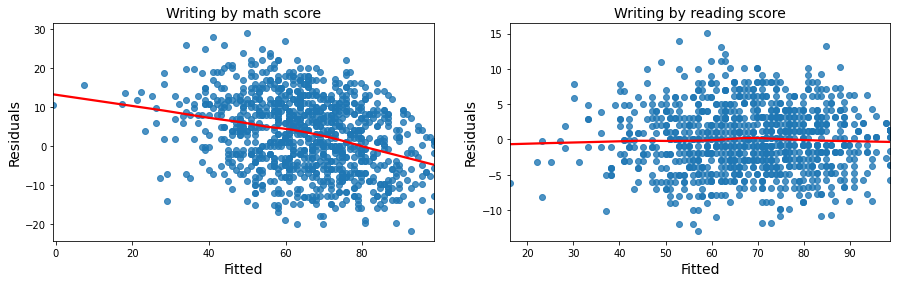

In [26]:
plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.regplot(x = "writ_math_fitted", y = "writ_math_residuals", 
            data = student_perform, lowess = True,  line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Writing by math score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = "writ_read_fitted", y = "writ_read_residuals", 
            data = student_perform, lowess = True, line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Writing by reading score', fontsize = 14)

plt.show()

<font size="4">  Checking normal distribution of residuals </font>

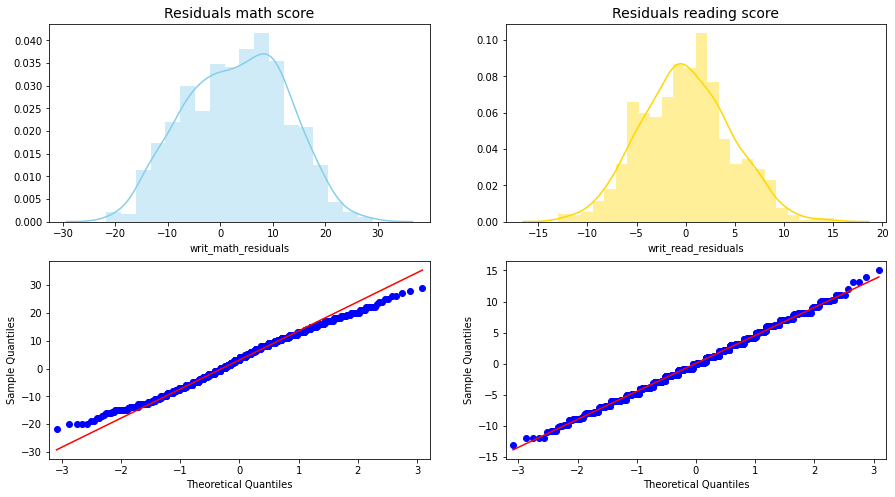

In [28]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(221)
sns.distplot(student_perform['writ_math_residuals'], color = "skyblue")
ax.set_title('Residuals math score', fontsize = 14)

ax = fig.add_subplot(222)
sns.distplot(student_perform['writ_read_residuals'], color= "gold")
ax.set_title('Residuals reading score', fontsize = 14)

ax = fig.add_subplot(223)
sm.qqplot(student_perform['writ_math_residuals'], line='q',ax = ax)

ax = fig.add_subplot(224)
sm.qqplot(student_perform['writ_read_residuals'], line='q',ax = ax)


plt.show()

<font size="4"> c) Predicting reading score by math score or writing score </font>

In [38]:
lin_reg = LinearRegression()
read_writ_model = lin_reg.fit(student_perform[['writing_score']], student_perform[['reading_score']])
read_writ_R_2 = read_writ_model.score(student_perform[['writing_score']], student_perform[['reading_score']])
print(f' Predicting reading score by writing score - R^2 coefficient: {read_writ_R_2}')


read_math_model = lin_reg.fit(student_perform[['math_score']], student_perform[['reading_score']])
read_math_R_2 = read_math_model.score(student_perform[['math_score']], student_perform[['reading_score']])
print(f' Predicting reading score by math score - R^2  coefficient: {read_math_R_2}')

 Predicting reading score by writing score - R^2 coefficient: 0.9112574888913136
 Predicting reading score by math score - R^2  coefficient: 0.6684365064501091


<font size="4"> To check linearity we can plot observed vs. predicted values </font>

In [31]:
read_writ_fitted_vals = read_writ_model.predict(student_perform[['writing_score']])
read_math_fitted_vals = read_math_model.predict(student_perform[['math_score']])

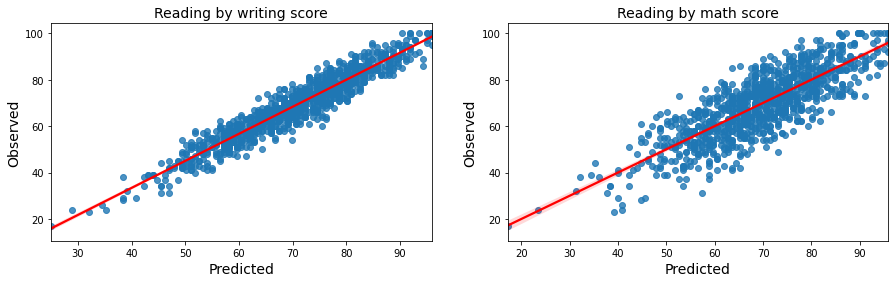

In [32]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.regplot(x = read_writ_fitted_vals, y = student_perform[['reading_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Reading by writing score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = read_math_fitted_vals, y = student_perform[['reading_score']], line_kws={'color': 'red'})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Observed", fontsize=14)
plt.title('Reading by math score', fontsize = 14)

plt.show()

<font size="4">  Checking homoscedasticity </font>

In [33]:
student_perform['read_writ_fitted'] = read_writ_fitted_vals
student_perform['read_writ_residuals'] = student_perform['reading_score'] - student_perform['read_writ_fitted']
student_perform['read_math_fitted'] = read_math_fitted_vals
student_perform['read_math_residuals'] = student_perform['reading_score'] - student_perform['read_math_fitted']

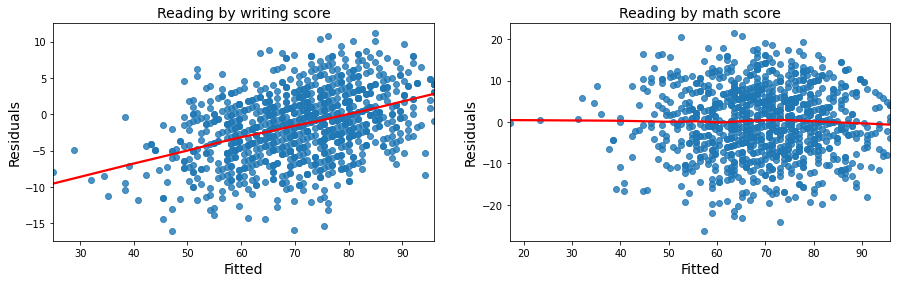

In [34]:
plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.regplot(x = "read_writ_fitted", y = "read_writ_residuals", 
            data = student_perform, lowess = True,  line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Reading by writing score', fontsize = 14)

plt.subplot(122)
sns.regplot(x = "read_math_fitted", y = "read_math_residuals", 
            data = student_perform, lowess = True, line_kws={'color': 'red'})
plt.xlabel("Fitted", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title('Reading by math score', fontsize = 14)

plt.show()

<font size="4">  Checking normal distribution of residuals </font>

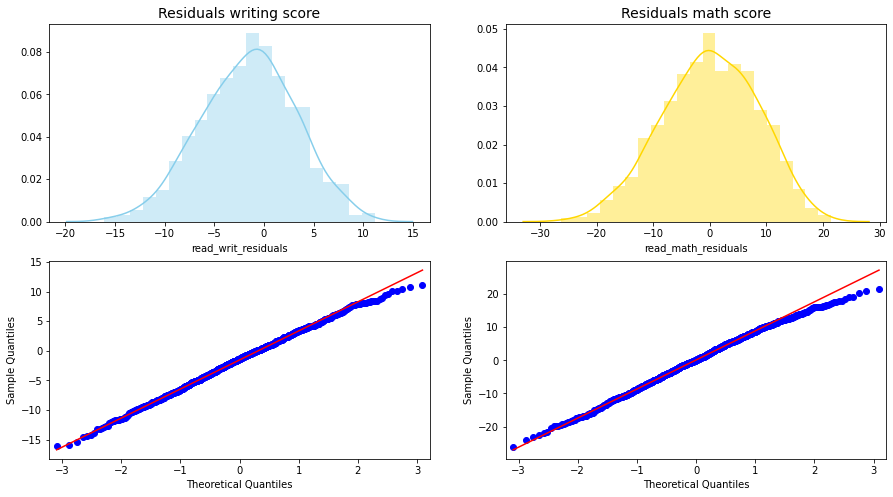

In [35]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(221)
sns.distplot(student_perform['read_writ_residuals'], color = "skyblue")
ax.set_title('Residuals writing score', fontsize = 14)

ax = fig.add_subplot(222)
sns.distplot(student_perform['read_math_residuals'], color= "gold")
ax.set_title('Residuals math score', fontsize = 14)

ax = fig.add_subplot(223)
sm.qqplot(student_perform['read_writ_residuals'], line='q',ax = ax)

ax = fig.add_subplot(224)
sm.qqplot(student_perform['read_math_residuals'], line='q',ax = ax)


plt.show()

# Whether student's race or/and parents level of education influences lunch type of their children

<font size="4">  1. Student race influences on lunch type </font>

In [181]:
race_lunch = pd.crosstab(index = student_perform['race/ethnicity'], 
                         columns = student_perform['lunch'])
race_lunch

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


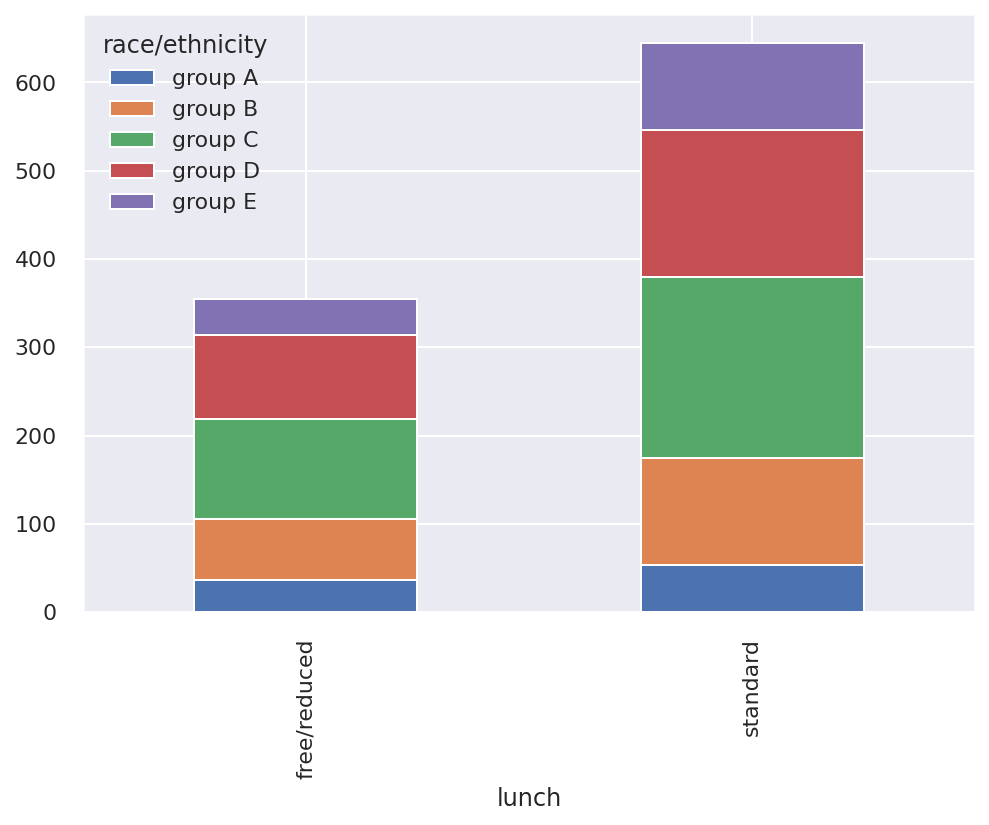

In [182]:
sns.set()
race_lunch.T.plot(kind = 'bar', stacked = True)


In [183]:
chi, p, df, expect = scs.chi2_contingency(race_lunch)
print(f' Chi squared test p-value: {p}')

 Chi squared test p-value: 0.48669808284196503


<font size="4">  Race group does not influence on lunch type </font>

<font size="4">  2. Parents level of education influences on lunch type </font>

In [184]:
education_lunch = pd.crosstab(index = student_perform['parental level of education'], 
                              columns = student_perform['lunch'])
education_lunch

lunch,free/reduced,standard
parental level of education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


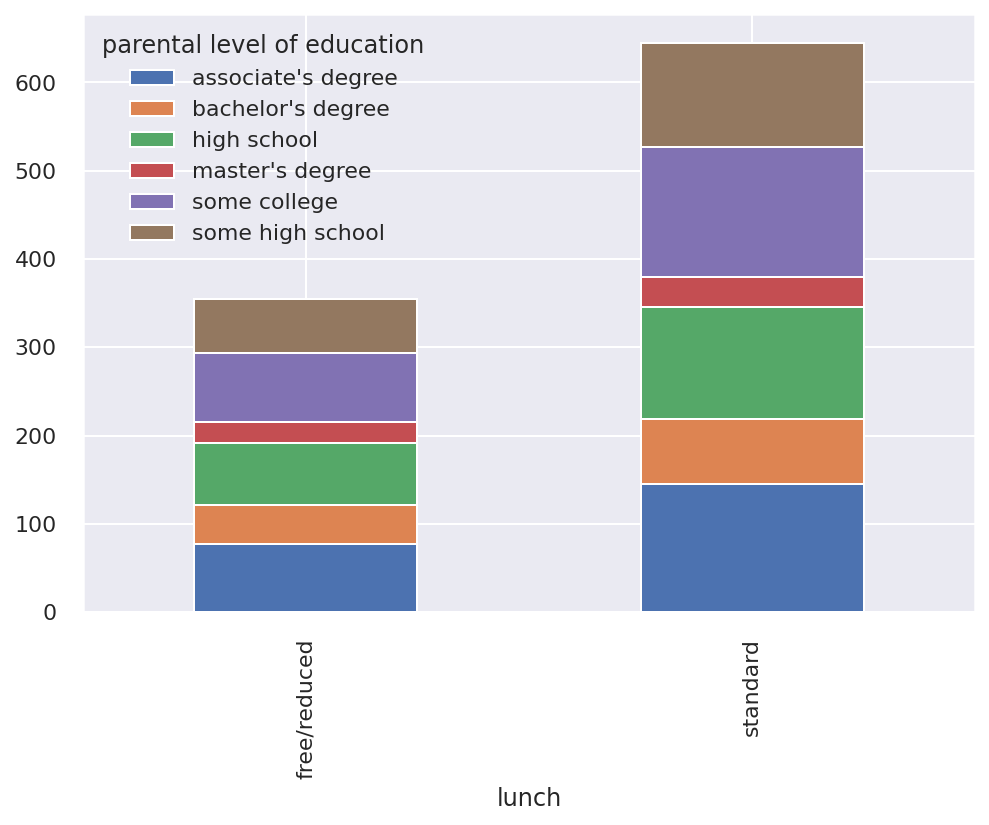

In [185]:
sns.set()
education_lunch.T.plot(kind = 'bar', stacked = True)

In [186]:
chi, p, df, expect = scs.chi2_contingency(education_lunch)
print(f' Chi squared test p-value: {p}')

 Chi squared test p-value: 0.9531014927218224


<font size="4">  Parents education level does not influence on lunch type </font>

<font size="4">  3. Student race and parents level of education influences on lunch type </font>

In [187]:
race_education_lunch = pd.crosstab(index = [student_perform['race/ethnicity'], 
                            student_perform['parental level of education']], 
                            columns = student_perform['lunch'])
race_education_lunch

lunch                                       free/reduced  standard
race/ethnicity parental level of education                        
group A        associate's degree                      7         7
               bachelor's degree                       2        10
               high school                             7        11
               master's degree                         2         1
               some college                            7        11
               some high school                       11        13
group B        associate's degree                     14        27
               bachelor's degree                       9        11
               high school                            16        32
               master's degree                         4         2
               some college                           16        21
               some high school                       10        28
group C        associate's degree                     22        56
               bachelor's degree                      15        25
               high school                            23        41
               master's degree                        10         9
               some college                           23        46
               some high school                       21        28
group D        associate's degree                     21        29
               bachelor's degree                      14        14
               high school                            16        28
               master's degree                         5        18
               some college                           26        41
               some high school                       13        37
group E        associate's degree                     13        26
               bachelor's degree                       4        14
               high school                             8        14
               master's degree                         3         5
               some college                            7        28
               some high school                        6        12

In [190]:
chi, p, df, expect = scs.chi2_contingency(race_education_lunch)
print(f' Chi squared test p-value: {p}')

 Chi squared test p-value: 0.41050056464171486


<font size="4">  Student race and parents level of education do not influence on lunch type </font>